# **Captura en tiempo real**

## **Metodo para capturar imagen en google colab**

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode
from IPython.display import Image
import os
from __future__ import print_function
import requests
import json
import cv2


In [3]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## **Prediccion Api**

<IPython.core.display.Javascript object>

Saved to photo.jpg


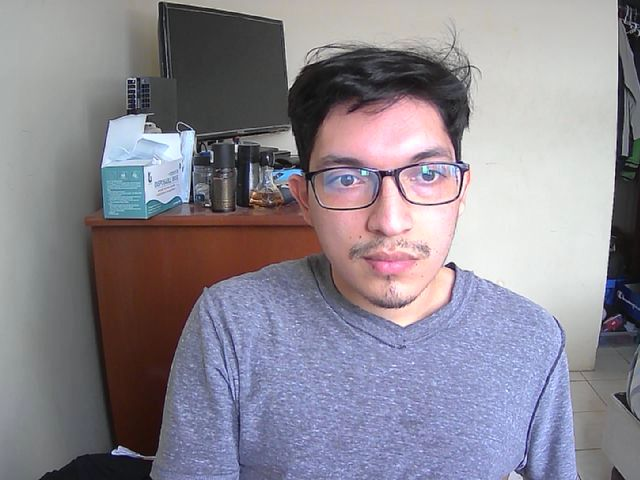

In [6]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### **Funcion Para mostrar Emoji segun nuestra respuesta de la API**

In [12]:
def emociones (emocion):
    ruta = '/content/drive/My Drive/Reconocimiento De Emociones/src/Emojis/'
    if emocion == 'Enojado':
        return ruta + 'Enojado.jpg'
    elif emocion == 'Disgustado':
         return ruta + 'Disgustado.jpg'
    elif emocion == 'Temerosa':
         return ruta + 'asustado.jpg'
    elif emocion == 'Feliz':
         return ruta + 'Feliz.jpg'
    elif emocion == 'Neutral':
         return ruta + 'Neutral.jpg'
    elif emocion == 'Triste':
         return ruta + 'tristeza.jpeg'
    elif emocion == 'Sorprendido':
         return ruta + 'sorprendido.jpg'
    else:
         return ruta + 'Neutral.jpg'

### **Probando la API**

In [10]:
addr = 'http://34b0f55d41ea.ngrok.io'
test_url = addr + '/emociones'
# prepare headers for http request
content_type = 'image/jpeg'
headers = {'content-type': content_type}
img = cv2.imread("/content/photo.jpg")
# encode image as jpeg
_,img_encoded = cv2.imencode('.jpg', img)
# send http request with image and receive response
response = requests.post(test_url, data=img_encoded.tostring(), headers=headers)
# decode response
#print(json.loads(response.text))
r = json.loads(response.text)
#print("/content/photo.jpg: {}".format(r))

print('Tu emocion es : ' + r["emocion"])
#img_emocion = cv2.imread(emociones(r["emocion"]))
# loop over the faces and draw them on the image

Tu emocion es : Neutral


{'num_faces': 1, 'emocion': 'Neutral', 'faces': [{'py/tuple': [289, 104, 483, 298]}], 'success': True, 'URL_DRIVE': '/content/drive/My Drive/Reconocimiento De Emociones/data/202097171944rostrodetectado.jpg'}
/content/drive/My Drive/Reconocimiento De Emociones/data/202097171944rostrodetectado.jpg


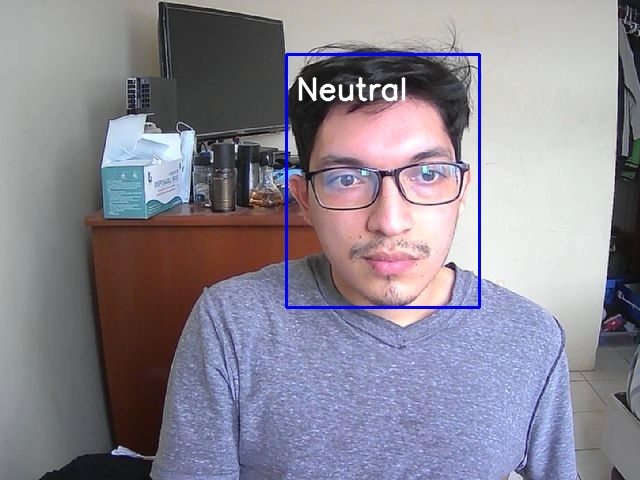

In [11]:
print(r)
print(r["URL_DRIVE"])
rutaimg = r["URL_DRIVE"]
cap = cv2.imread(rutaimg)
cv2_imshow(cap)

/content/drive/My Drive/Reconocimiento De Emociones/src/Emojis/Neutral.jpg


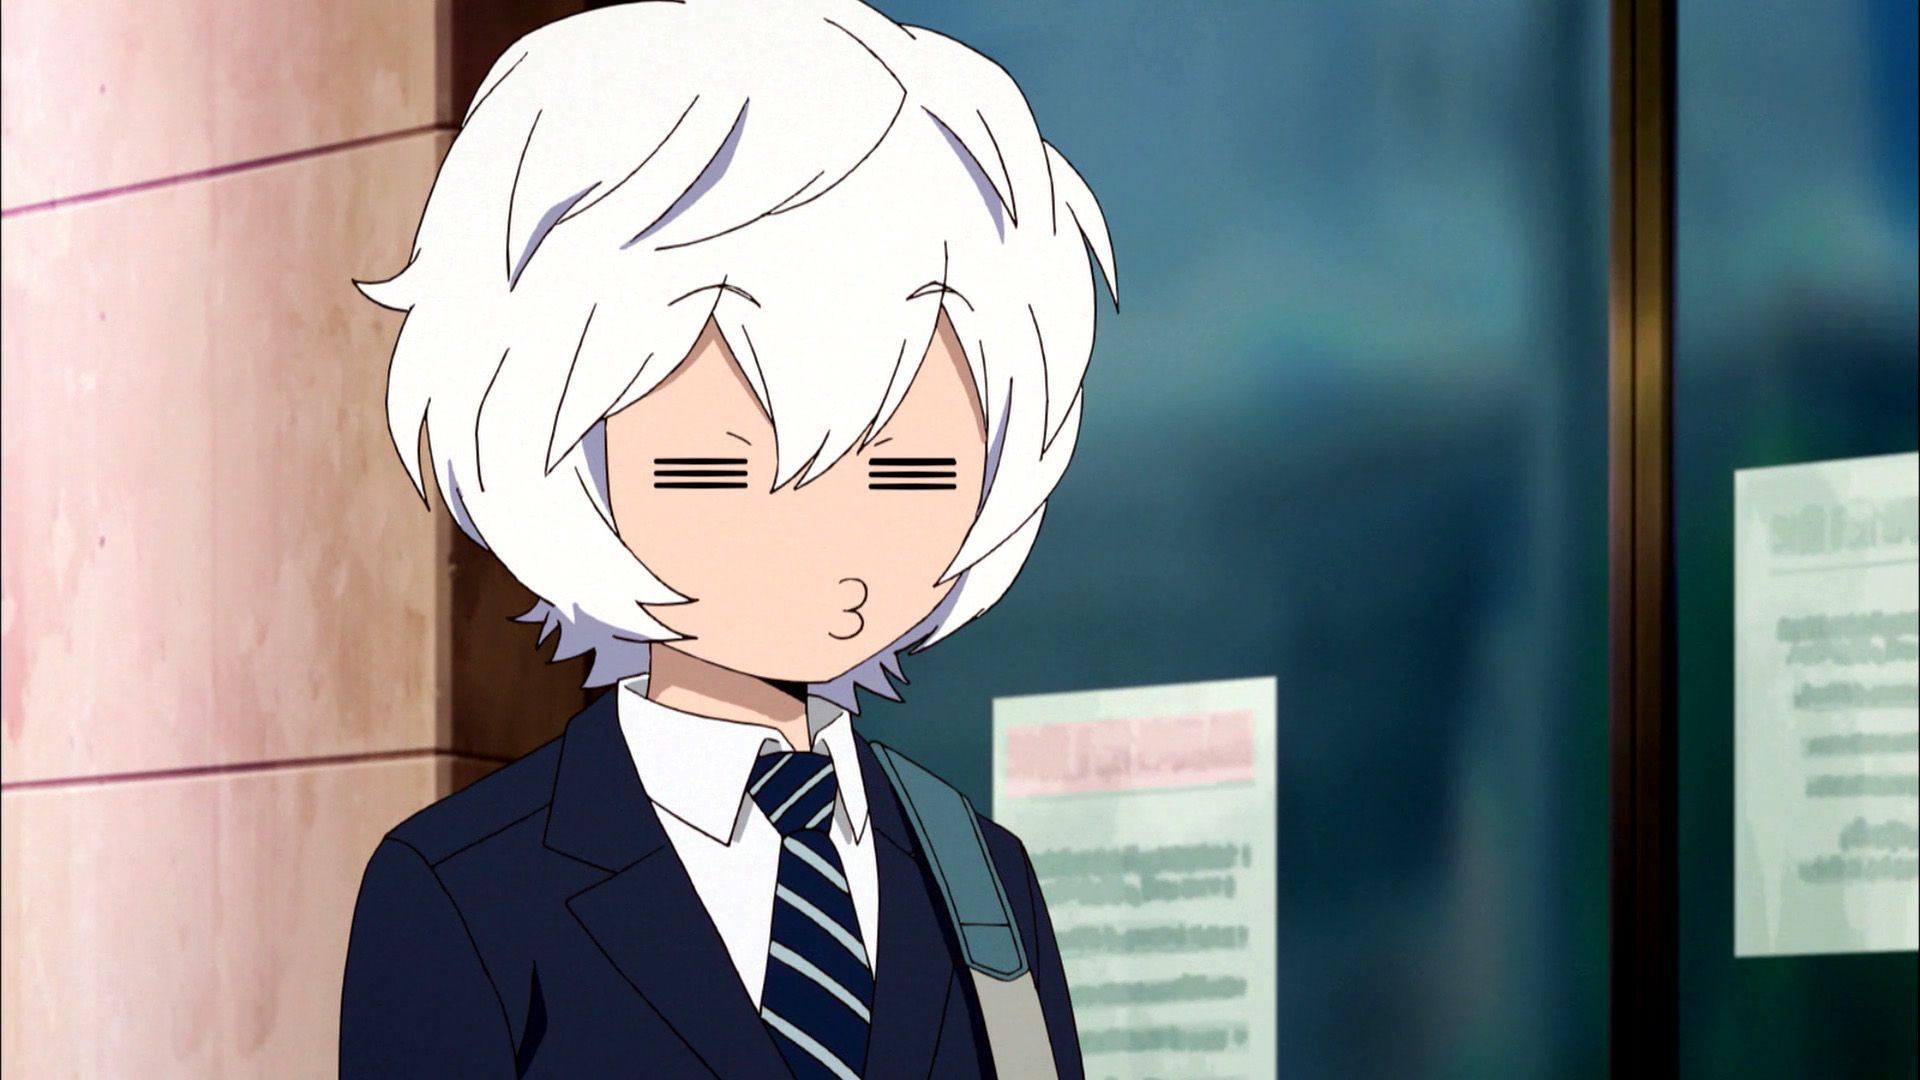

In [13]:
ruta = emociones(r["emocion"])
print(ruta)
cap = cv2.imread(ruta)
cv2_imshow(cap)